# 🔍 Modèles avancés : XGBoost & HistGradientBoosting

## 📦 Chargement des données

In [6]:
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from scipy import sparse
from xgboost import XGBRegressor

os.makedirs("predicts", exist_ok=True)
os.makedirs("models/regression", exist_ok=True)
os.makedirs("models/regression/train_test", exist_ok=True)


In [7]:
# Chargement des features et de la target
X = sparse.load_npz("features/features_fiverr.npz")
y = joblib.load("models/y_prix.pkl")

# Découpage train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

joblib.dump(X_train, "models/regression/train_test/X_train.pkl")
joblib.dump(X_test, "models/regression/train_test/X_test.pkl")
joblib.dump(y_train, "models/regression/train_test/y_train.pkl")
joblib.dump(y_test, "models/regression/train_test/y_test.pkl")

# Chargement des features et targets
X_train = joblib.load("models/regression/train_test/X_train.pkl")
X_test = joblib.load("models/regression/train_test/X_test.pkl")
y_train = joblib.load("models/regression/train_test/y_train.pkl")
y_test = joblib.load("models/regression/train_test/y_test.pkl")

print("✅ Données chargées :", X_train.shape, y_train.shape)


✅ Données chargées : (1007, 1327) (1007,)


## 🚀 Modèle 1 : XGBoost

In [8]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
xgb_r2 = r2_score(y_test, xgb_pred)

print(f"MAE (XGB) : {xgb_mae:.2f}")
print(f"RMSE (XGB): {xgb_rmse:.2f}")
print(f"R² (XGB)  : {xgb_r2:.2f}")

joblib.dump(xgb_model, "models/regression/xgb_model.pkl")
joblib.dump(xgb_pred, "predicts/xgb_pred.pkl")

MAE (XGB) : 12.78
RMSE (XGB): 48.87
R² (XGB)  : -0.01


['predicts/xgb_pred.pkl']

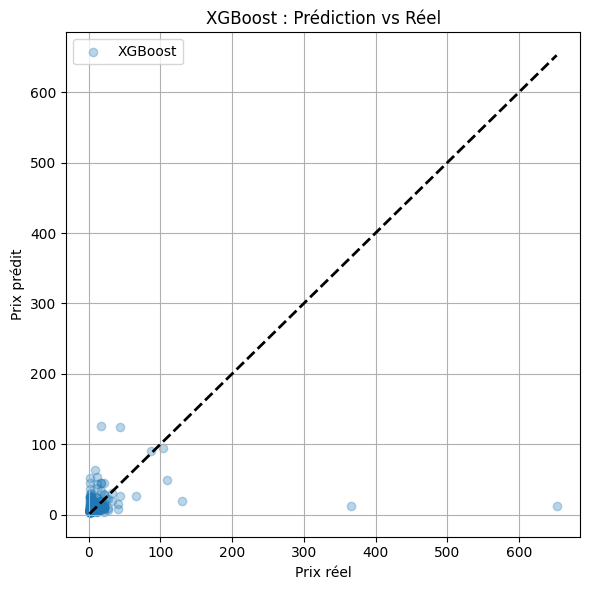

In [9]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, xgb_pred, alpha=0.3, label="XGBoost")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("XGBoost : Prédiction vs Réel")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🌄 Modèle 2 : HistGradientBoosting

In [10]:
# 🔁 Conversion des matrices sparse en dense
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# 🚀 Entraînement du modèle
hgb_model = HistGradientBoostingRegressor(random_state=42)
hgb_model.fit(X_train_dense, y_train)

# 🔍 Prédictions
hgb_pred = hgb_model.predict(X_test_dense)

# 📊 Évaluation
hgb_mae = mean_absolute_error(y_test, hgb_pred)
hgb_rmse = mean_squared_error(y_test, hgb_pred, squared=False)
hgb_r2 = r2_score(y_test, hgb_pred)

print(f"MAE (HGB) : {hgb_mae:.2f}")
print(f"RMSE (HGB): {hgb_rmse:.2f}")
print(f"R² (HGB)  : {hgb_r2:.2f}")

# 💾 Sauvegarde
joblib.dump(hgb_model, "models/regression/hgb_model.pkl")
joblib.dump(hgb_pred, "predicts/hgb_pred.pkl")


MAE (HGB) : 17.25
RMSE (HGB): 49.19
R² (HGB)  : -0.02


['predicts/hgb_pred.pkl']

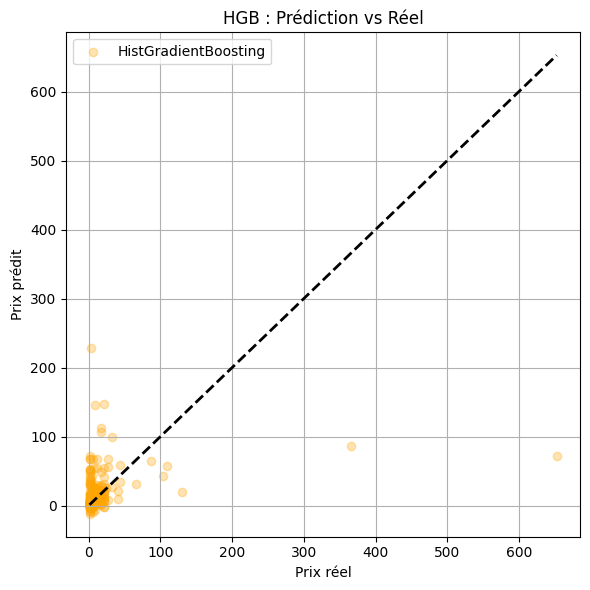

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, hgb_pred, alpha=0.3, color="orange", label="HistGradientBoosting")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("HGB : Prédiction vs Réel")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


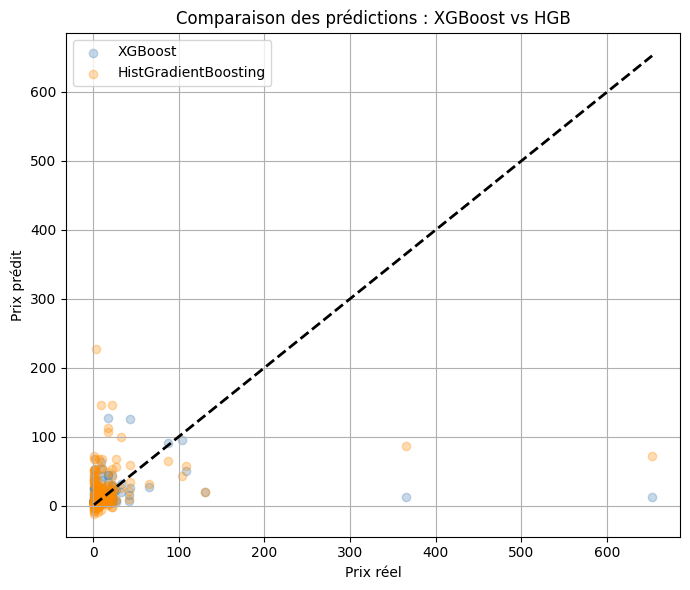

In [12]:
plt.figure(figsize=(7, 6))

# 🔵 XGBoost
plt.scatter(y_test, xgb_pred, alpha=0.3, color='steelblue', label='XGBoost')

# 🟠 HistGradientBoosting
plt.scatter(y_test, hgb_pred, alpha=0.3, color='darkorange', label='HistGradientBoosting')

# 🔁 Ligne idéale (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# 📊 Mise en forme
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("Comparaison des prédictions : XGBoost vs HGB")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 📊 Comparaison des modèles

In [13]:
print("🔸 XGBoost :")
print(f"   MAE  = {xgb_mae:.2f}")
print(f"   RMSE = {xgb_rmse:.2f}")
print(f"   R²   = {xgb_r2:.2f}")
print("\n🔸 HistGradientBoosting :")
print(f"   MAE  = {hgb_mae:.2f}")
print(f"   RMSE = {hgb_rmse:.2f}")
print(f"   R²   = {hgb_r2:.2f}")


🔸 XGBoost :
   MAE  = 12.78
   RMSE = 48.87
   R²   = -0.01

🔸 HistGradientBoosting :
   MAE  = 17.25
   RMSE = 49.19
   R²   = -0.02
